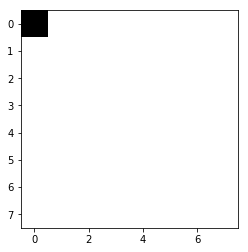

In [14]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

i  = Image.open('./images/dot.png')
image_arr = np.asarray(i)
# print(image_arr)

plt.imshow(image_arr)
plt.show()

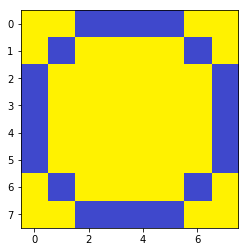

In [15]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

i  = Image.open('./images/numbers/y0.4.png')
image_arr = np.asarray(i)
# print(image_arr)

plt.imshow(image_arr)
plt.show()

/home/sonu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/home/sonu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


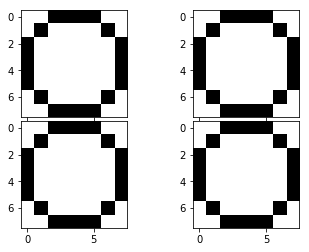

In [25]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
from functools import reduce

def threshold(image_arr): #  for balck and white
    balance_arr = []
    new_arr = image_arr
    for each_row in image_arr:
        for each_pix in each_row:
            avg_num = reduce( lambda x , y : x + y , each_pix[:3])/len(each_pix[:3])
            balance_arr.append(avg_num)
    balance = reduce( lambda x , y : x + y , balance_arr)/len(balance_arr)
    for each_row in new_arr:
        for each_pix in each_row:
            if reduce( lambda x , y : x + y , each_pix[:3])/len(each_pix[:3]) > balance:
                each_pix[0] = 255
                each_pix[1] = 255
                each_pix[2] = 255
                each_pix[3] = 255
            else:
                each_pix[0] = 0
                each_pix[1] = 0
                each_pix[2] = 0
                each_pix[3] = 255
    return new_arr   
            
i0 = Image.open('images/numbers/0.1.png')
image_arr0 = np.array(i0);

i1 = Image.open('images/numbers/y0.4.png')
image_arr1 = np.array(i1);

i2 = Image.open('images/numbers/y0.5.png')
image_arr2 = np.array(i2);

i3 = Image.open('images/numbers/0.1.png')
image_arr3 = np.array(i3);

threshold(image_arr1)
threshold(image_arr2)

fig = plt.figure()
ax0 = plt.subplot2grid((8, 6) , (0 , 0) , rowspan=4 , colspan = 3)
ax1 = plt.subplot2grid((8, 6) , (4 , 0) , rowspan=4 , colspan = 3)
ax2 = plt.subplot2grid((8, 6) , (0 , 3) , rowspan=4 , colspan = 3)
ax3 = plt.subplot2grid((8, 6) , (4 , 3) , rowspan=4 , colspan = 3)

ax0.imshow(image_arr0)
ax1.imshow(image_arr1)
ax2.imshow(image_arr2)
ax3.imshow(image_arr3)

plt.show()

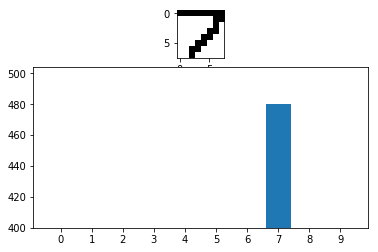

In [22]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
from functools import reduce
from collections import Counter

def create_examples():
    number_array = open('numA.txt', 'a')
    num_available = range(0,10)
    ver_available = range(1,10)
    
    for each_num in num_available:
        for each_ver in ver_available:
#             print(str(each_num) + str(each_ver))
            image_paths = 'images/numbers/' +str(each_num) + '.' + str(each_ver) + '.png'
            example_image = Image.open(image_paths)
            example_image_arr = np.array(example_image)
            example_image_arr1 = str(example_image_arr.tolist())
            line_write = str(each_num) + '::'+example_image_arr1 + '\n'
            number_array.write(line_write)
            
# create_examples()

def threshold(image_arr): #  for balck and white
    balance_arr = []
    new_arr = image_arr
    for each_row in image_arr:
        for each_pix in each_row:
            avg_num = reduce( lambda x , y : x + y , each_pix[:3])/len(each_pix[:3])
            balance_arr.append(avg_num)
    balance = reduce( lambda x , y : x + y , balance_arr)/len(balance_arr)
    for each_row in new_arr:
        for each_pix in each_row:
            if reduce( lambda x , y : x + y , each_pix[:3])/len(each_pix[:3]) > balance:
                each_pix[0] = 255
                each_pix[1] = 255
                each_pix[2] = 255
                each_pix[3] = 255
            else:
                each_pix[0] = 0
                each_pix[1] = 0
                each_pix[2] = 0
                each_pix[3] = 255     
    return new_arr

def check_number(file_path):
    matched_array = []
    load_examples = open("numA.txt" , "r").read()
    load_examples = load_examples.split('\n')
    
    i = Image.open(file_path)
    image_arr = np.array(i)
    image_arr1 = image_arr.tolist();
    
    inQuestion = str(image_arr1)
    for each_example in load_examples:
        if len(each_example) > 3:
            split_ex = each_example.split('::')
            curr_num = split_ex[0]
            curr_arr = split_ex[1]
            each_pix_ex = curr_arr.split('],')
            each_pix_inq = inQuestion.split('],')
            x = 0
            while x < len(each_pix_ex):
                if each_pix_ex[x] == each_pix_inq[x]:
                    matched_array.append(int(curr_num))
                x+=1
            
#         print(matched_array)
    x = Counter(matched_array)
#         print(x)  

    graphX = []
    graphY = []

    for each_thing in x:
        graphX.append(each_thing)
        graphY.append(x[each_thing])


    fig = plt.figure()
    ax0 = plt.subplot2grid((4, 4) , (0 , 0) , rowspan=1 , colspan = 4)
    ax1 = plt.subplot2grid((4, 4) , (1 , 0) , rowspan=3 , colspan = 4)

    ax0.imshow(image_arr)
    ax1.bar(graphX ,graphY , align = 'center')
    plt.ylim(400)
    
    x_loc = plt.MaxNLocator(12)
    ax1.xaxis.set_major_locator(x_loc)
    plt.show()

        
check_number('images/numbers/7.4.png')
